# Training a RNN model network on multiple cognitive tasks

Here, we implement the codes from the following paper:

> "Task representations in neural networks trained to perform many cognitive tasks." Guangyu Robert Yang, Madhura R. Joglekar, H. Francis Song, William T. Newsome & Xiao-Jing Wang (2019). [*Nature Neuroscience* Volume 22, pp. 297–306](https://www.nature.com/articles/s41593-018-0310-2).

The original Tensorflow implemetation can be found [at this repo](https://github.com/gyyang/multitask).

This code trains a RNN model for multiple types of cognitive tasks. `RNN_rate_dynamics.py` is a custom RNN implementation of **continuous-time rate-neuron network dynamics**, which is commonly used in neuroscience models:

$$ \tau \dot{h} = - h + \sigma(W_{hh} h + W_{ih} s) $$

where $x$ is neural (hidden) state,  $s$ is (sensory) input, and $W_{hh}, W_{ih}$ are synaptic weight parameters (recurrent and input weights).

Note that this model uses continuous-time dynamics description, $\dot{h} = f(h(t))$, 
whereas deep-learning models use discrete-time dynamics: $h_{t+1} = f(h_{t})$.

Here's a sample code for running the RNN model:

In [1]:
import torch
from RNN_rate_dynamics import RNNLayer

T, batch = 1000, 100
n_input, n_rnn, n_output = 10, 500, 5

rnn  = RNNLayer(n_input, n_rnn, torch.nn.ReLU(), 0.9, True)   # input_size, hidden_size, nonlinearity, decay, bias

The main training code is defined in `multitask/train.py`: Here is a sample code to train the model. 

In [2]:
import multitask

hp, log, optimizer = multitask.set_hyperparameters(model_dir='debug', hp={'learning_rate': 0.001}, ruleset='mante') #, rich_output=True)
run_model = multitask.Run_Model(hp, RNNLayer)
multitask.train(run_model, optimizer, hp, log)

Trial       0  | Time 0.00 s  | Now training contextdm1 & contextdm2
contextdm1     | cost 0.608713| c_reg 0.000000  | perf 0.24
contextdm2     | cost 0.713639| c_reg 0.000000  | perf 0.15
Trial   32000  | Time 72.59 s  | Now training contextdm1 & contextdm2
contextdm1     | cost 0.222354| c_reg 0.000000  | perf 0.50
contextdm2     | cost 0.220101| c_reg 0.000000  | perf 0.50
Trial   64000  | Time 141.07 s  | Now training contextdm1 & contextdm2
contextdm1     | cost 0.169905| c_reg 0.000000  | perf 0.65
contextdm2     | cost 0.175795| c_reg 0.000000  | perf 0.57
Trial   96000  | Time 211.51 s  | Now training contextdm1 & contextdm2
contextdm1     | cost 0.140437| c_reg 0.000000  | perf 0.71
contextdm2     | cost 0.165278| c_reg 0.000000  | perf 0.66
Trial  128000  | Time 286.64 s  | Now training contextdm1 & contextdm2
contextdm1     | cost 0.138565| c_reg 0.000000  | perf 0.74
contextdm2     | cost 0.107535| c_reg 0.000000  | perf 0.80
Trial  160000  | Time 354.95 s  | Now training c

Finally, let's visualize the results. The analysis functions are in `multitask/standard_analysis.py`

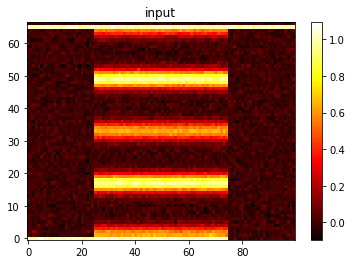

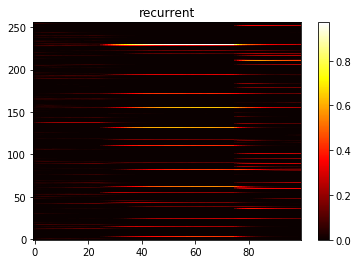

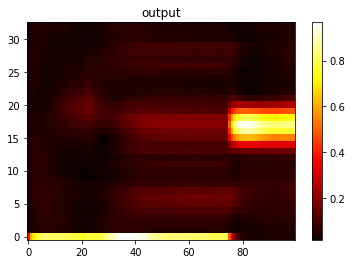

In [3]:
rule = 'contextdm1'
multitask.standard_analysis.easy_activity_plot(run_model, rule)

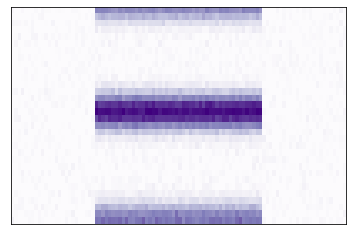

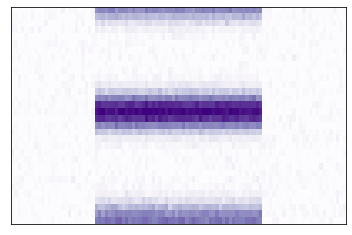

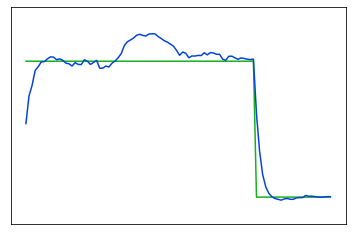

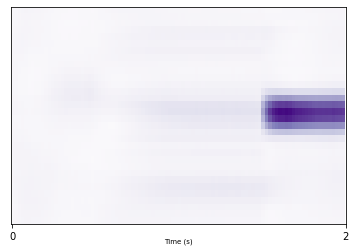

In [4]:
multitask.standard_analysis.pretty_inputoutput_plot(run_model, rule)